# Part 1: Statistical learning
The setting and the estimator object (not included)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1797, 8, 8)


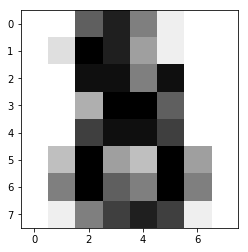

In [2]:
#digits data set
from sklearn import datasets
digits = datasets.load_digits()
print digits.images.shape

plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='none')

data = digits.images.reshape((digits.images.shape[0], -1))

# Part 2: Supervised learning
Predicting an output variable from high-dimensional observations

In [3]:
#iris data set
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [4]:
#Let's use K-nearest neighbor (KNN) to try to classify
#Split iris data in train and test data
#A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
#Create and fit a nn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
iris_y_guess = knn.predict(iris_X_test)
print iris_y_guess
print iris_y_test

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


In [5]:
#Let's practice regression on the diabetes data set
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train,diabetes_y_train)
var = np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)
print var
print regr.score(diabetes_X_test, diabetes_y_test)

2004.56760269
0.585075302269


# Digits exercise
Here I will work with the K-nearest neighbor classifier to classify the digits, and then use linear regression to do something similar, hopefully.

In [7]:
#First get the data
digits = datasets.load_digits()
N = int(digits.data.shape[0]*0.9)
digits_X_train = digits.data[:N]
digits_X_test  = digits.data[N:]
digits_y_train = digits.target[:N]
digits_y_test  = digits.target[N:]
knn = KNeighborsClassifier()
knn.fit(digits_X_train, digits_y_train)
digits_y_guess = knn.predict(digits_X_test)
print digits_y_guess - digits_y_test
print digits_y_test[:10]

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -6  0  4  0 -4  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -7  0
  0  0  0  0  0]
[5 2 8 0 1 7 6 3 2 1]


In [9]:
regr = linear_model.LinearRegression()
regr.fit(digits_X_train,digits_y_train)
var = np.mean((regr.predict(digits_X_test)-digits_y_test)**2)
print var
print regr.score(digits_X_test, digits_y_test)
print regr.predict(digits_X_test)-digits_y_test

4.74411630688
0.408955609608
[ 1.48068841 -1.27675458 -2.85120408  0.7548301   2.2608682   0.2474247
 -0.02438887 -0.87107968 -2.77279246  1.95328432 -0.6680488   2.95867256
 -0.12826369 -2.64807558  1.19470341 -0.19258099 -0.6412402   1.70556446
  1.43182892 -1.59966449 -1.34340226 -1.43066442 -1.73501708  1.55202358
  0.07543667  0.96022349 -0.7944568  -1.77786006 -2.43640393 -5.85346554
 -0.93982986  0.37784529 -3.16294911  0.95564144  1.60081205  1.44858812
  0.1183889   0.953639    1.44221857 -1.01469026 -0.26262586 -6.21028625
 -0.74678629  4.21938838  0.08047689 -5.99955282  2.39361038 -2.68862619
  0.61875    -3.56299572  1.03698843  1.30974609 -1.59268483  1.50102794
  2.41178895  1.63047556 -0.34104641  0.29692916 -2.43508936 -1.42376897
  0.15589712  1.3831513   0.22952093  0.99761318 -0.01522874  1.46011679
 -2.04022878 -2.25452769 -2.57698829 -1.87118356 -0.49529194  3.08599431
 -0.54144502  2.75157318  1.83707871  3.25678172 -1.95783441 -0.15173674
 -2.91960507 -1.2982910